In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
books = pd.read_csv("/data/ephemeral/home/book/code/data/books.csv")
ratings = pd.read_csv("/data/ephemeral/home/book/code/data/train_ratings.csv")

In [5]:
print(ratings.head())

   user_id        isbn  rating
0        8  0002005018       4
1    67544  0002005018       7
2   123629  0002005018       8
3   200273  0002005018       8
4   210926  0002005018       9


In [6]:
print(books.head())

         isbn                                         book_title  \
0  0002005018                                       Clara Callan   
1  0060973129                               Decision in Normandy   
2  0374157065  Flu: The Story of the Great Influenza Pandemic...   
3  0399135782                             The Kitchen God's Wife   
4  0425176428  What If?: The World's Foremost Military Histor...   

            book_author  year_of_publication                 publisher  \
0  Richard Bruce Wright               2001.0     HarperFlamingo Canada   
1          Carlo D'Este               1991.0           HarperPerennial   
2      Gina Bari Kolata               1999.0      Farrar Straus Giroux   
3               Amy Tan               1991.0          Putnam Pub Group   
4         Robert Cowley               2000.0  Berkley Publishing Group   

                                             img_url language       category  \
0  http://images.amazon.com/images/P/0002005018.0...       en  ['A

## 파레토 법칙

### 책별 평점 개수 집계 및 시각화

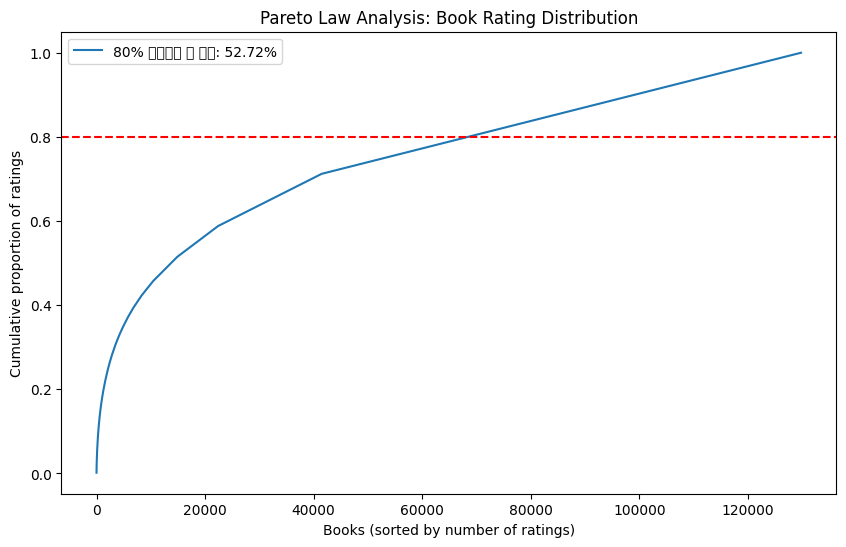

In [ ]:
# 책별 평점 개수 집계
book_counts = ratings["isbn"].value_counts()

# 누적 비율 계산
book_cum_counts = book_counts.cumsum() / book_counts.sum()

# 파레토 법칙에 맞는지 확인하기 위해 80%에 해당하는 책 비율을 계산
pareto_80_books = book_cum_counts[book_cum_counts <= 0.8].count() / book_counts.count() * 100

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(book_cum_counts.values, label=f"80% 차지하는 책 비율: {pareto_80_books:.2f}%")
plt.axhline(y=0.8, color="r", linestyle="--")
plt.xlabel("Books (sorted by number of ratings)")
plt.ylabel("Cumulative proportion of ratings")
plt.title("Pareto Law Analysis: Book Rating Distribution")
plt.legend()
plt.show()

- 위 52.72%의 책이 80%를 차지하고 있어, 파레토 법칙을 따르지 않는다고 판단
- 일부 책이 인기가 많지만, 나머지 많은 책들도 상대적으로 고르게 평점을 받고 있다는 의미로 해석

### 사용자별 평점 개수 집계 및 시각화

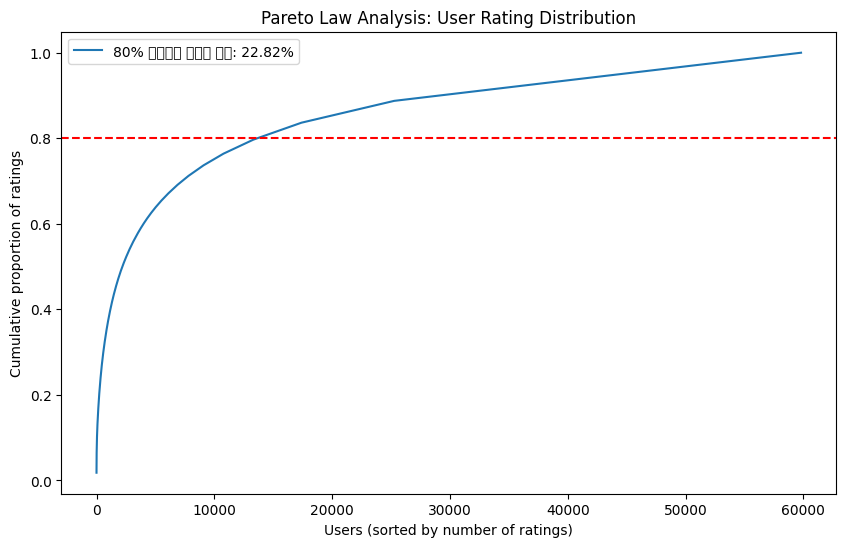

In [ ]:
# 사용자별 평점 개수 집계
user_counts = ratings["user_id"].value_counts()

# 누적 비율 계산
user_cum_counts = user_counts.cumsum() / user_counts.sum()

# 파레토 법칙에 맞는지 확인하기 위해 80%에 해당하는 사용자 비율을 계산
pareto_80_users = user_cum_counts[user_cum_counts <= 0.8].count() / user_counts.count() * 100

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(user_cum_counts.values, label=f"80% 차지하는 사용자 비율: {pareto_80_users:.2f}%")
plt.axhline(y=0.8, color="r", linestyle="--")
plt.xlabel("Users (sorted by number of ratings)")
plt.ylabel("Cumulative proportion of ratings")
plt.title("Pareto Law Analysis: User Rating Distribution")
plt.legend()
plt.show()

- 상위 20%에 근접한 22.82%의 사용자가 전체 평점의 80%를 차지. 즉, 파레토 법칙을 따른다고 판단
- 소수의 적극적인 사용자들이 대다수의 평점을 남기고 있는 경향을 보여주며, 사용자 활동 패턴이 파레토 법칙을 어느 정도 따르고 있다는 의미로 해석

## Cold Start

### Test에서 새로이 등장하는 유저 확인

In [ ]:
test = pd.read_csv("/data/ephemeral/home/book/code/data/test_ratings.csv")
train = pd.read_csv("/data/ephemeral/home/book/code/data/train_ratings.csv")

In [ ]:
# train과 test의 user_id를 집합(set) 형태로 저장
train_users = set(train["user_id"].unique())
test_users = set(test["user_id"].unique())

# test에만 존재하는 user_id 추출
new_users_in_test = test_users - train_users
print(f"Number of new users in test set: {len(new_users_in_test)}")
print("New users in test set:", new_users_in_test)
print(f"cold start ratio: {len(new_users_in_test) / len(test)}")

Number of new users in test set: 8266
New users in test set: {163845, 262152, 98312, 32779, 229392, 131089, 32791, 196636, 163869, 163870, 32799, 163874, 131110, 196650, 262190, 51, 262195, 98358, 229434, 163905, 32834, 65605, 73, 32848, 196688, 83, 229459, 98388, 131158, 196699, 229469, 163936, 65632, 32867, 229481, 163946, 262252, 109, 131183, 131184, 131190, 229505, 32909, 32911, 131217, 32917, 262297, 32930, 131236, 196773, 176, 196787, 65718, 196795, 65724, 164029, 190, 32958, 196799, 131271, 98505, 164053, 215, 164055, 65755, 65760, 98531, 164085, 98550, 196856, 164093, 257, 164098, 131340, 131345, 262421, 278, 280, 291, 131369, 196906, 229674, 98602, 196910, 164143, 65839, 98606, 65846, 262457, 33081, 326, 262470, 229705, 332, 33101, 334, 164173, 196944, 229711, 164183, 345, 33113, 164186, 262492, 196956, 262494, 164198, 33126, 196969, 262507, 164206, 65904, 131443, 98679, 65918, 262535, 98702, 197016, 262556, 197020, 33193, 131498, 33194, 229807, 432, 98740, 131513, 164288, 460

10% 가량의 새로운 유저에 대해 ColdStart 문제가 발생할 수 있다고 판단

In [ ]:
# 상위 20% 기준 계산
user_rating_counts = train["user_id"].value_counts()
active_user_threshold = user_rating_counts.quantile(0.80)
print(f"상위 20% 유저는 {active_user_threshold}개 이상의 평점을 남김")

상위 20% 유저는 4.0개 이상의 평점을 남김


In [ ]:
active_user = train.user_id.value_counts()
print(f"Train 전체 사람 수: {len(train.user_id.unique())}")
print(f"4권 이하 리뷰 수:{active_user.where(active_user < 4).count()}, {active_user.where(active_user < 4).count() / len(train.user_id.unique()):.2f}")

Train 전체 사람 수: 59803
4권 이하 리뷰 수:46580, 0.78


In [ ]:
# test 데이터프레임에서 중복된 user_id 확인
duplicate_user_ids = test["user_id"].duplicated(keep=False)

# 중복된 user_id만 추출
duplicate_user_ids_list = test[duplicate_user_ids]

# 중복된 user_id의 고유 개수 확인
num_duplicate_user_ids = duplicate_user_ids_list["user_id"].nunique()

print(f"중복된 user_id의 개수: {num_duplicate_user_ids}")

중복된 user_id의 개수: 9382


In [66]:
# 사용자별 평점 개수 계산
user_rating_counts = train["user_id"].value_counts()

# 최대 평점 개수 확인
max_ratings_per_user = user_rating_counts.max()

print(f"최대 {max_ratings_per_user}개의 평점이 하나의 user_id에서 발생")

최대 5520개의 평점이 하나의 user_id에서 발생
